**MALL CUSTOMER SEGMENTATION**


Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics.

It is an essential strategy as the owner of Naivas Supermarket can target these specific groups of customers and effectively allocate marketing resources. Case in point, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products or subscribe for a service; another group might include customers from non-profit organizations. A business task is to retain those customers.

**Problem**

As the owner of Naivas Supermarket, you want to understand the customers who can easily converge [Target Customers]. The insights from the data will then be reported to the marketing team, who will later plan a strategy accordingly.

**Context**

Through loyalty cards, you have some basic data about your customers like Customer ID, age, gender, annual income, and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing .

**Motivation**

The main objective of this project is to learn the purpose of market basket analysis. Also try to learn the customers purchasing behavior so as to group them according to their preferences.later on this information is handed over to the marketing team.

Data information

There is one dataset called Mall_Customers. It consists of the following attributes:
CustomerID; a primary key which uniquely identifies a customer in a table.
Gender; an attribute showing the Gender of  a customer. A customer can either be a male (m) or a female (f)
Age; Age of the customer.
Annual Income(k%)
Spending_Score(1-100); Score assigned by the  mall based on customer behavior and spending.

In this particular dataset there are 210 samples to study.


**Load Data From a Mall Customer CSV File**

In [ ]:
# Load data from a mall customer csv file

%load_ext sql

# Then connect to our in memory sqlite database
# NB: This database will cease to exist as soon as the database connection is closed.
%sql sqlite://

'Connected: @None'

**Dependencies**

At this stage we  import libraries that we rely on so as to develop a solution for this problem.
Some of these libraries are :
NumPy / pandas; assist us to treat and explore the data, and execute vector and matrix operations.

matplotlib / seaborn; a tool that will help to plot the information so we can visualize it in various ways and have a better understanding of it.

Plotly; assist us in plotting data in a fancy way.

sklearn; Will provide all necessary tools to train our models and test them afterwards.

In [ ]:
#Dependencies
#import python libraries
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading the  table from a local CSV file
# Read the CSV

with open('Mall_Customers.csv','r') as f:
    df = pd.read_csv(f, index_col=0, encoding='utf-8') 

# Then storing it in an SQL table of our in memory sqlite database

%sql DROP TABLE df;
%sql PERSIST df;

 * sqlite://
(sqlite3.OperationalError) no such table: df
[SQL: DROP TABLE df;]
(Background on this error at: http://sqlalche.me/e/14/e3q8)
 * sqlite://


'Persisted df'

Below is a snippet of the 80 rows of the data frame showcasing the different features of a customerID, Gender, Age, Annual income, spending score etc

In [ ]:
# Display the loaded csv file on the console
%%sql
SELECT * FROM df

 * sqlite://
Done.


CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3
10,Female,30,19,72


**Data understanding**

In [ ]:
df.describe()

,Gender,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


The above 3 variables seem legible:

Age; it lies between 18 and 70, all values seem to be legible
Annual income; it lies between 15k to 137k $
Spending score; it Lies between 1 and 99, which also seems legible.

**Data Exploration**

In this stage we are doing a little bit of data exploration, checking for null values, object data types and other things we might consider in order to keep our data clean and well structured. Also normalization will be undertaken in this stage.

***Pre-processing***
The 'Gender' Attribute or feature column in this dataset is a norminal variable ; the k-Means algorithm isn’t directly applicable to nominal variables as the Euclidean distance function isn’t really meant for discrete variables. So, we’ll e drop this feature and run clustering.


In [ ]:
#Display dataset of Naivas Supermarket
#print the first five rows
print (df.head())

            Gender  Age  Annual Income (k$)  Spending Score (1-100)
CustomerID                                                         
1             Male   19                  15                      39
2             Male   21                  15                      81
3           Female   20                  16                       6
4           Female   23                  16                      77
5           Female   31                  17                      40


We observe that there 5 columns CustomerID, Gender, Age, Annual Income (k$) Spending Score (1-100)

In [ ]:
# check data size
df.shape

(200, 4)

changing attribute names into a format which is easier to access

In [ ]:
#Changing columns name into an easier format
df = df.rename(columns={'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'})

Check for null values

In [ ]:
#check if there are null values
df.isna().sum()

Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

check for datatypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   Annual_Income   200 non-null    int64 
 3   Spending_Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


The 'Gender' Attribute or feature column in this dataset is a norminal variable or a categorical variable ; the k-Means algorithm isn’t directly applicable to nominal variables as the Euclidean distance function isn’t really meant for discrete variables.
so, wobject gender we are going to replace its values. Male will be 1 and female 0

In [ ]:
#Replace object for a nominal variable or nonnumerical values
df['Gender'].replace(['Male','Female'], [1,0],inplace=True)

Checking if values have been updated properly

In [ ]:
# check if values have been updated properly
df.Gender

CustomerID
1      1
2      1
3      0
4      0
5      0
      ..
196    0
197    0
198    1
199    1
200    1
Name: Gender, Length: 200, dtype: int64

**Data Visualization**

At this juncture we  visualize our data and plot important information so we can see or even visualize a  different values that our data has and its behaviour.
To achieve that, we are only going to consider the following features or attributes: Annual_income, Spending_score and Age. 
Gender is a nominal or categorical variable which  will only be useful in  data separation making it easier to  distinguish  values for men and women.

Density estimation of values using distplot

The distplot() function combines the matplotlib hist function with the seaborn kdeplot() and rugplot() functions

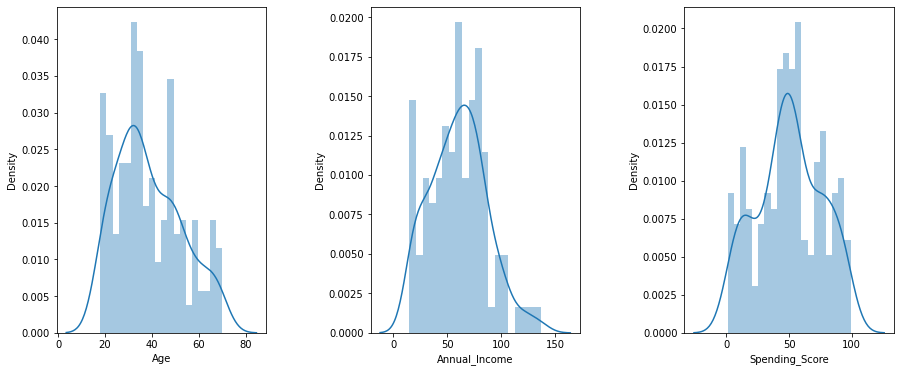

In [ ]:
#Density estimation of values using distplot
plt.figure(1 , figsize = (15 , 6))
feature_list = ['Age','Annual_Income', "Spending_Score"]
pos = 1 
for i in feature_list:
    plt.subplot(1 , 3 , pos)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5 )
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5 )
    sns.distplot(df[i], bins=20,  kde = True)
    pos = pos + 1
plt.show()

From the plot we Observe that the distribution of these values resembles a Gaussian distribution, where the vast majority of the values lay in the middle with some exceptions in the extremes

Implement count function and plot gender

0    112
1     88
Name: Gender, dtype: int64


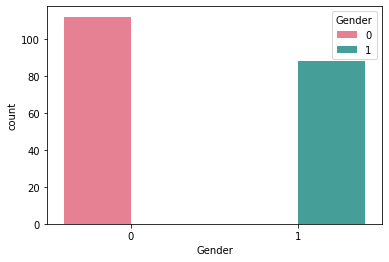

In [ ]:
#plot age parameters
age = sns.countplot(x="Gender", data=df, palette="husl" , hue = "Gender" )
#calculating male , female observations
print(df['Gender'].value_counts())

From our sampling we can see that there are more female customers than men.


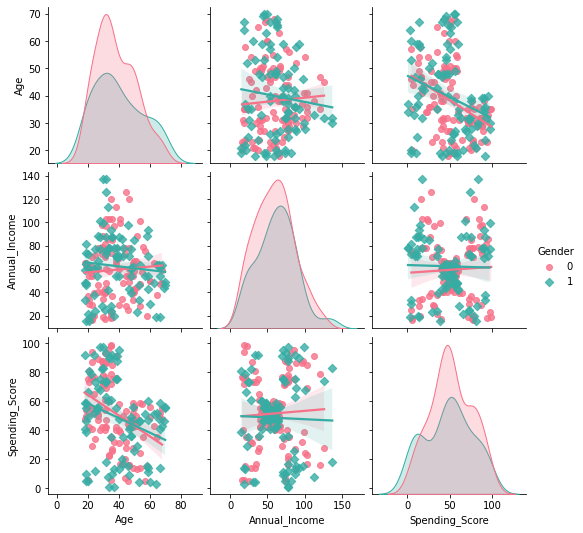

In [ ]:
#Pairplot with variables we want to study
sns.pairplot(df, vars=["Age", "Annual_Income", "Spending_Score"],  kind ="reg", hue = "Gender", palette="husl", markers = ['o','D'])

In the above pairplot we observe different variable how are related to each other.
The pink colour is in a higher ratio than the blue one, since there are more women than men

Age and Annual Income

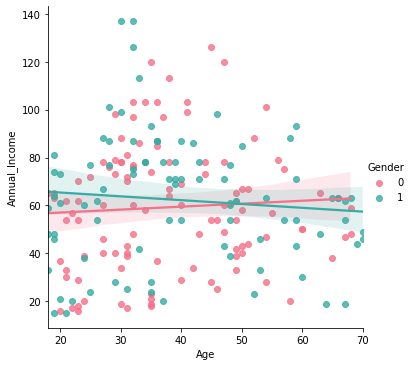

In [ ]:
sns.lmplot(x = "Age", y = "Annual_Income", data = df, hue = "Gender" , palette="husl")

From the above graph people on  their thirties, forties and fifities tend to earn more money annually than the ones younger than thirty or older than fifty years old.
A group of people whose age lays between thirty and fifty years old seem to get better jobs since they might be more experienced than those who are below thirties.
Those below thirties are earning less because some are still in school or are dependent on those who are working.
A group of people who are above fifty earn less probably because they don't have much energy or even because they have retired.
Also, we are able to see how males tend to earn a little bit more money than females, at least until fifty years old.

Spending Score and Annual Income

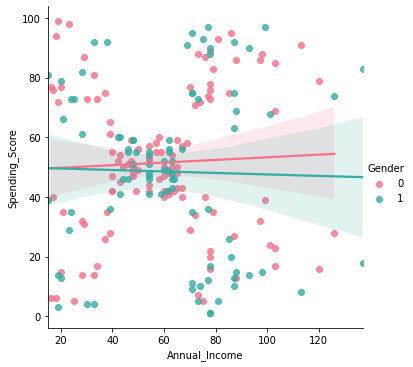

In [ ]:
sns.lmplot(x = "Annual_Income", y = "Spending_Score", data = df, hue = "Gender", palette="husl")

From the graph we can conclude that better annual income might lead to having a higher spending score, specially for women.

Age and Spending Score

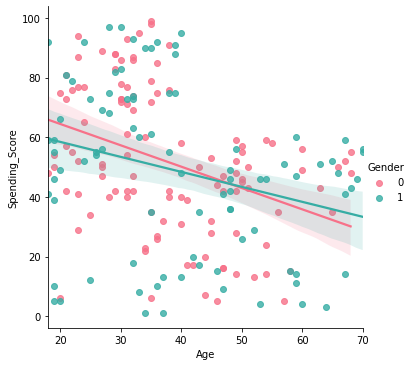

In [ ]:
sns.lmplot(x = "Age", y = "Spending_Score", data = df, hue = "Gender", palette="husl")

At this point we can predict that young people tend to spend more than older people. That can be due to a number of reasons:
Young people usually have more free time than old people.
A large number of young people are still in school and engaged with alot of activities.
Shopping malls tend to have shops that target young people such as videogames, technology stores, sporting activities etc

**Selecting number of clusters**

Elbow method assist us to decide the amount of clusters we want to divide our data in.

In [ ]:
#Creating values for the elbow
X = df.loc[:,["Age", "Annual_Income", "Spending_Score"]]
inertia = []
k = range(1,20)
for i in k:
    means_k = KMeans(n_clusters=i, random_state=0)
    means_k.fit(X)
    inertia.append(means_k.inertia_)

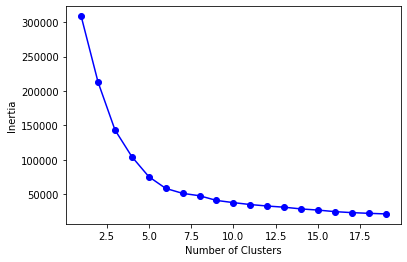

In [ ]:
#Plotting the elbow
plt.plot(k , inertia , 'bo-')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Elbow method is useful in determining the optimal number of clusters in Kmeans clustering.
This method plots the value of the cost function produced by different values of k and one should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data.
In this problem, we are using the inertia as cost function in order to identify the sum of squared distances of samples to the nearest cluster centre.

***Clustering***

In clustering we will not consider gender due to the following issues:
Most shop target both males and females customers.
In this dataset there is minimal difference between data for male and female.
Lastly but not least is that we do not want to interefere with process of unsupervised learning.


In [ ]:
#Training kmeans with 5 clusters
means_k = KMeans(n_clusters=5, random_state=0)
means_k.fit(X)
labels = means_k.labels_
centroids = means_k.cluster_centers_

K-means algorithm has already finished its work and now it's time to plot the results 

In [ ]:
#Create a 3d plot to view the data sepparation made by Kmeans
trace1 = go.Scatter3d(
    x= X['Spending_Score'],
    y= X['Annual_Income'],
    z= X['Age'],
    mode='markers',
     marker=dict(
        color = labels, 
        size= 10,
        line=dict(
            color= labels,
        ),
        opacity = 0.9
     )
)
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Spending_score'),
            yaxis = dict(title  = 'Annual_income'),
            zaxis = dict(title  = 'Age')
        )
)
fig = go.Figure(data=trace1, layout=layout)
py.offline.iplot(fig)

The results are obtained by K-means on this 3D graphic,

Yellow Cluster - The yellow cluster groups young people with moderate to low annual income who actually spend a lot.

Purple Cluster - The purple cluster groups reasonably young people with pretty decent salaries who spend a lot.

Pink Cluster - The pink cluster basically groups people of all ages whose salary isn't pretty high and their spending score is moderate.

Orange Cluster - The orange cluster groups people who actually have pretty good salaries and barely spend money, their age usually lays between thirty and sixty years.

Blue Cluster - The blue cluster groups whose salary is pretty low and don't spend much money in stores, they are people of all ages.